Python Project
Analysis of growing elderly population in the United States: Population of long term nursing home residents - comparison of quality of care for non-profit and for-profit facilities. Analysis wether staffing hours reflect on long term residents well-being, can increasing of staffing hours improve patients well being? Proposing measure to improve quality of care for the long term nursing home residents etc

In [72]:
%matplotlib inline

In [177]:

import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
plt.style.use('ggplot')

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [181]:
?plt

In [3]:
pop = pd.read_csv('data/population_usafacts.csv')
pop.head(30)

,Years,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Population (People),76094000,77584000,79163000,80632000,82166000,83822000,85450000,87008000.0,88710000.0,...,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0,331501080.0,331893745.0
1,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years of age (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19980936.0,19855184.0,19878806.0,19924706.0,19936737.0,19895016.0,19778527.0,19571339.0,19301292.0,NaN
3,5 to 14 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41146522.0,41232578.0,41200030.0,41105432.0,41084557.0,41113762.0,41100800.0,41041806.0,40992134.0,NaN
4,15 to 24 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43970419.0,44010321.0,43952354.0,43779770.0,43507796.0,43167197.0,42902176.0,42710397.0,42555684.0,NaN
5,25 to 34 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42304034.0,42854406.0,43475811.0,44073239.0,44775127.0,45319858.0,45679060.0,46003684.0,46069646.0,NaN
6,35 to 44 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40511710.0,40446168.0,40403298.0,40440626.0,40463900.0,40767905.0,41232094.0,41674444.0,42136192.0,NaN
7,45 to 54 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44255965.0,43749265.0,43329465.0,43013105.0,42703288.0,42227049.0,41571660.0,40860323.0,40366133.0,NaN
8,55 to 64 years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38575865.0,39279688.0,39985560.0,40746246.0,41391871.0,41873702.0,42219277.0,42431225.0,42403677.0,NaN
9,65+ years (People),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43132211.0,44632337.0,46161005.0,47655870.0,49208479.0,50757639.0,52354605.0,54036735.0,55659365.0,NaN


In [152]:

state_ave = pd.read_csv('data/NH_StateUSAverages_Mar2022.csv')
state_ave = state_ave.dropna()
state_ave.reset_index(drop = True, inplace = True)
state_ave

,State or Nation,Cycle 1 Total Number of Health Deficiencies,Cycle 1 Total Number of Fire Safety Deficiencies,Cycle 2 Total Number of Health Deficiencies,Cycle 2 Total Number of Fire Safety Deficiencies,Cycle 3 Total Number of Health Deficiencies,Cycle 3 Total Number of Fire Safety Deficiencies,Average Number of Residents per Day,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,...,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of high risk long stay residents with pressure ulcers,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who made improvements in function,Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who were rehospitalized after a nursing home admission,Percentage of short stay residents who had an outpatient emergency department visit,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Processing Date
0,NATION,8.1,4.4,8.4,4.5,8.2,4.4,76.1,2.19,0.88,...,19.668208,8.331217,95.823852,73.117484,78.789996,22.868748,10.491720,1.446247,0.793767,2022-03-01
1,AK,7.8,7.8,11.9,5.1,12.8,9.5,35.3,4.73,0.67,...,17.222425,6.497252,97.293507,76.823628,81.053333,15.731127,10.859274,0.711204,0.814816,2022-03-01
2,AL,2.8,3.0,3.0,3.3,4.0,3.4,87.6,2.20,0.90,...,24.154599,9.364816,93.862901,70.674791,79.280988,22.683458,11.068544,1.650541,0.810642,2022-03-01
3,AR,8.9,1.9,11.2,2.1,7.8,2.3,68.0,2.45,1.04,...,21.733165,8.800134,97.176200,77.538899,77.074772,24.461910,12.332341,1.885729,1.145302,2022-03-01
4,AZ,7.5,3.2,8.0,3.2,5.6,3.6,72.8,2.23,1.10,...,17.122904,9.191160,96.941473,72.474653,88.374039,23.891657,9.618150,1.284218,0.616814,2022-03-01
5,CA,14.0,6.9,13.6,6.8,12.8,6.4,78.4,2.53,1.20,...,13.938415,7.730066,98.463390,79.060813,92.175048,22.955641,9.423089,1.562994,0.634867,2022-03-01
6,CO,7.5,6.5,9.5,5.6,8.7,6.2,64.1,2.20,0.69,...,12.437422,5.923840,94.928936,74.365184,72.712037,19.346138,10.291593,0.949105,0.726071,2022-03-01
7,CT,7.4,2.9,9.9,2.8,7.8,2.0,90.8,2.08,0.80,...,18.159471,5.878316,94.406648,74.749366,71.582115,23.397134,10.654462,1.365649,0.588280,2022-03-01
8,DC,14.1,2.2,15.8,2.5,13.2,4.1,117.1,2.53,0.65,...,12.785124,10.694040,97.466695,66.430327,76.361594,16.952946,6.427184,0.836020,0.328906,2022-03-01
9,DE,13.2,0.8,14.7,1.1,14.0,1.4,78.7,2.26,0.91,...,20.461909,6.031351,97.962649,76.064145,84.940556,20.317469,9.622023,1.374963,0.660657,2022-03-01


None


In [153]:
staffing = state_ave.filter(regex='Staffing')
#staffing = state_ave.filter(regex='State')
staffing 

,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day
0,2.19,0.88,0.70,1.58,3.76,0.07,0.37450,3.15730
1,4.73,0.67,1.97,2.64,7.37,0.07,0.33011,3.05524
2,2.20,0.90,0.61,1.51,3.71,0.04,0.30843,2.94093
3,2.45,1.04,0.38,1.42,3.87,0.03,0.30297,2.92749
4,2.23,1.10,0.75,1.85,4.08,0.12,0.39204,3.16524
5,2.53,1.20,0.63,1.83,4.36,0.09,0.40456,3.16271
6,2.20,0.69,0.95,1.64,3.84,0.09,0.34833,3.01802
7,2.08,0.80,0.74,1.54,3.63,0.08,0.33502,3.04147
8,2.53,0.65,1.80,2.45,4.97,0.11,0.50243,3.50316
9,2.26,0.91,1.18,2.09,4.35,0.09,0.34173,3.04356


In [154]:
long_stay = state_ave.filter(regex='long')
long_stay

,Percentage of long stay residents whose need for help with daily activities has increased,Percentage of long stay residents who lose too much weight,Percentage of low risk long stay residents who lose control of their bowels or bladder,Percentage of long stay residents with a catheter inserted and left in their bladder,Percentage of long stay residents with a urinary tract infection,Percentage of long stay residents who have depressive symptoms,Percentage of long stay residents who were physically restrained,Percentage of long stay residents experiencing one or more falls with major injury,Percentage of long stay residents assessed and appropriately given the pneumococcal vaccine,Percentage of long stay residents who received an antipsychotic medication,Percentage of long stay residents whose ability to move independently worsened,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of high risk long stay residents with pressure ulcers,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days
0,15.650831,6.721291,47.120040,1.573436,2.438009,7.388876,0.171046,3.385799,93.267719,14.468181,22.094466,19.668208,8.331217,95.823852,1.446247,0.793767
1,11.778271,7.051415,39.156578,2.872281,3.532466,8.259307,0.259682,3.769294,95.616403,16.499538,23.757736,17.222425,6.497252,97.293507,0.711204,0.814816
2,14.115444,7.616959,41.978403,1.826009,3.182469,1.291478,0.737917,3.352214,93.033856,19.523315,20.104093,24.154599,9.364816,93.862901,1.650541,0.810642
3,13.717604,6.810043,42.273163,1.575070,2.371917,2.091665,0.227281,3.863767,94.431795,11.983685,16.338858,21.733165,8.800134,97.176200,1.885729,1.145302
4,13.567378,6.111603,53.094481,1.738824,1.523488,2.787418,0.144695,2.328816,96.866679,11.012468,24.664906,17.122904,9.191160,96.941473,1.284218,0.616814
5,9.185925,5.624824,33.569429,1.476837,1.229241,4.169621,0.242474,1.624840,98.033730,9.966051,16.189994,13.938415,7.730066,98.463390,1.562994,0.634867
6,15.850772,6.211679,47.400625,1.743782,2.156511,3.794788,0.075799,3.517889,89.994187,16.895499,22.122197,12.437422,5.923840,94.928936,0.949105,0.726071
7,16.447612,7.050222,42.530227,1.256163,1.955546,5.030850,0.016227,3.475760,89.178381,15.955427,24.935078,18.159471,5.878316,94.406648,1.365649,0.588280
8,17.236579,4.404594,62.464775,1.167336,1.945947,0.571551,0.539613,0.980193,93.861376,8.928867,29.344860,12.785124,10.694040,97.466695,0.836020,0.328906
9,16.034184,5.887010,50.401169,0.897858,2.176261,3.347549,0.167143,3.345562,95.136917,11.680675,25.153729,20.461909,6.031351,97.962649,1.374963,0.660657


In [15]:
?plot.bar


Object `plot.bar` not found.


TypeError: string indices must be integers

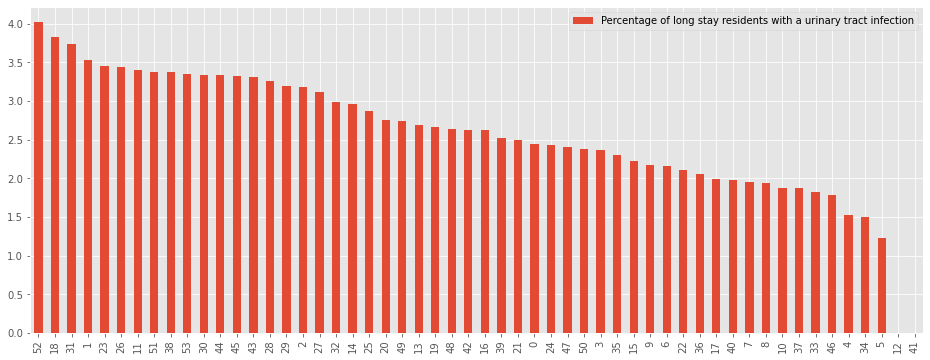

In [71]:
plt.rcParams["figure.figsize"] = [16, 6]
state_ave[['State or Nation','Percentage of long stay residents with a urinary tract infection']]\
.sort_values(ascending=False, by = 'Percentage of long stay residents with a urinary tract infection')\
.plot(kind = 'bar') #(color = 'b')

plt.title['The Elderly']

TypeError: 'str' object is not callable

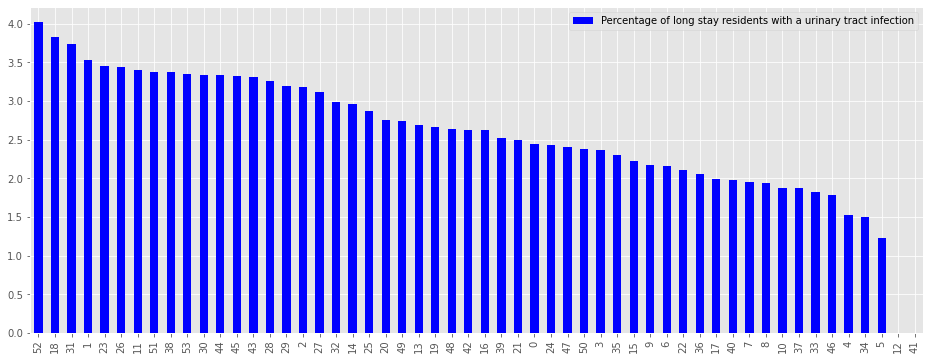

In [68]:
plt.rcParams["figure.figsize"] = [16, 6]
state_ave[['State or Nation','Percentage of long stay residents with a urinary tract infection']]\
.sort_values(ascending=False, by = 'Percentage of long stay residents with a urinary tract infection')\
.plot.bar(color = 'b')

plt.title('The Elderly')

In [85]:
?plt

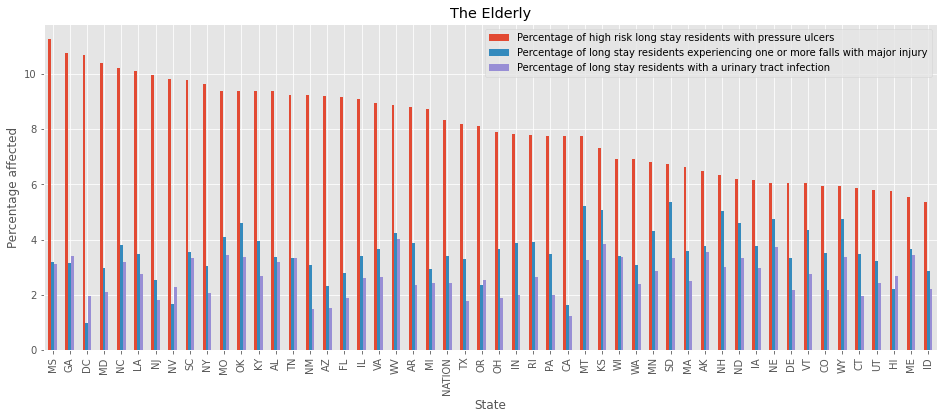

In [158]:
plt.rcParams["figure.figsize"] = [16, 6]


state_ave_plot = (state_ave.sort_values('Percentage of high risk long stay residents with pressure ulcers',\
                     ascending = False).plot.bar(x='State or Nation', 
                        y=['Percentage of high risk long stay residents with pressure ulcers',
                            'Percentage of long stay residents experiencing one or more falls with major injury',
                           'Percentage of long stay residents with a urinary tract infection']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))
#state_ave_plot.axis()



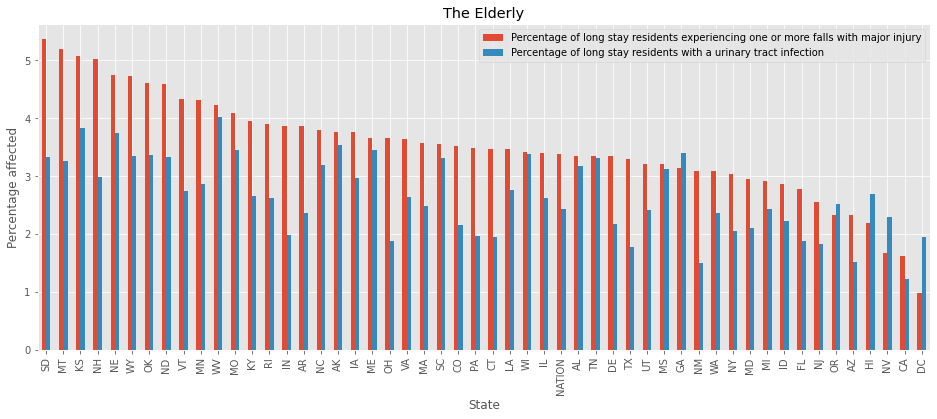

In [159]:
plt.rcParams["figure.figsize"] = [16, 6]


state_ave_plot = (state_ave.sort_values('Percentage of long stay residents experiencing one or more falls with major injury',\
                     ascending = False).plot.bar(x='State or Nation', 
                        y=['Percentage of long stay residents experiencing one or more falls with major injury',
                           'Percentage of long stay residents with a urinary tract infection']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))

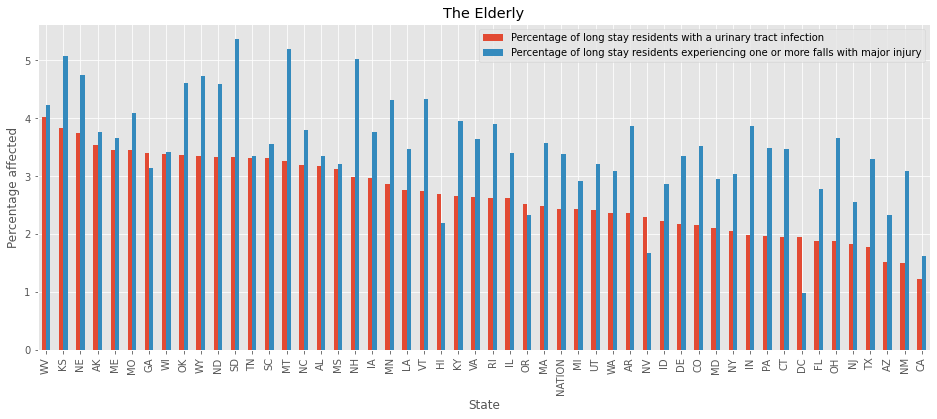

In [161]:
plt.rcParams["figure.figsize"] = [16, 6]


state_ave_plot = (state_ave.sort_values('Percentage of long stay residents with a urinary tract infection',\
                     ascending = False).plot.bar(x='State or Nation', 
                        y=['Percentage of long stay residents with a urinary tract infection',
                          'Percentage of long stay residents experiencing one or more falls with major injury']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))

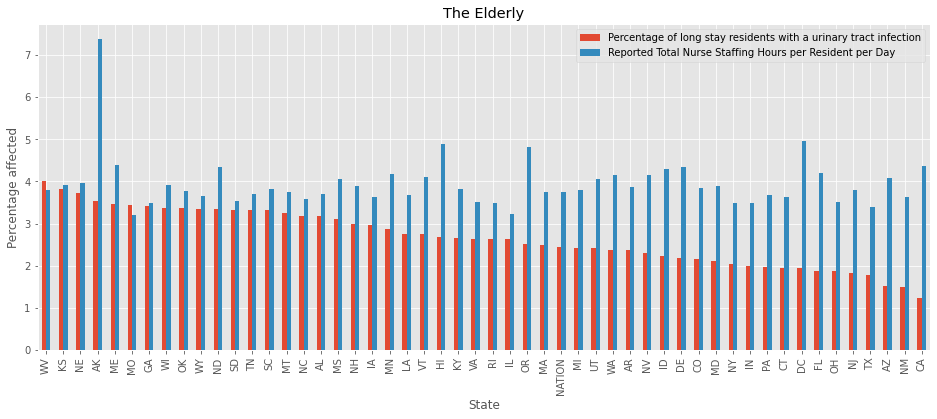

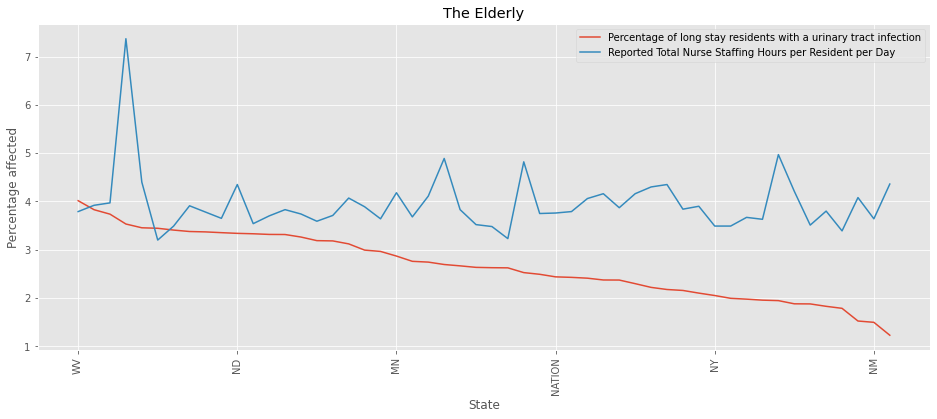

In [191]:
plt.rcParams["figure.figsize"] = [16, 6]


state_ave_plot = (state_ave.sort_values('Percentage of long stay residents with a urinary tract infection',\
                     ascending = False).plot.bar(x='State or Nation', 
                        y=['Percentage of long stay residents with a urinary tract infection','Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))

state_ave_plot = (state_ave.sort_values('Percentage of long stay residents with a urinary tract infection',\
                     ascending = False).plot.line(x='State or Nation', 
                        y=['Percentage of long stay residents with a urinary tract infection','Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))


# nurse_hrs = make_subplots(specs=[[{"secondary_y": False}]])
# nurse_hrs.add_trace(
#     go.Scatter(x=state_ave['State or Nation'], 
#                y=state_ave['Percentage of long stay residents with a urinary tract infection'], 
#                name="Column1", mode="lines"),
#     secondary_y=False
# )

# nurse_hrs = make_subplots(specs=[[{"secondary_y": True}]])
# nurse_hrs.add_trace(
#     go.Scatter(x=state_ave['State or Nation'], 
#                y=state_ave['Reported Total Nurse Staffing Hours per Resident per Day'], 
#                name="Column1", mode="lines"),
#     secondary_y=True
# )


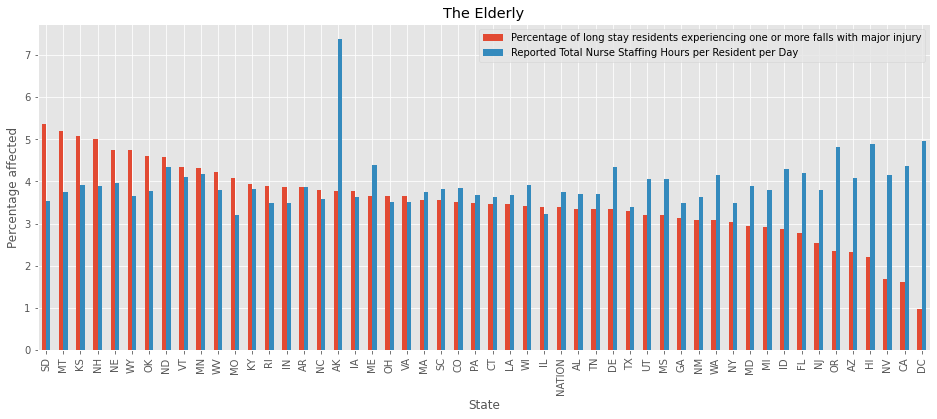

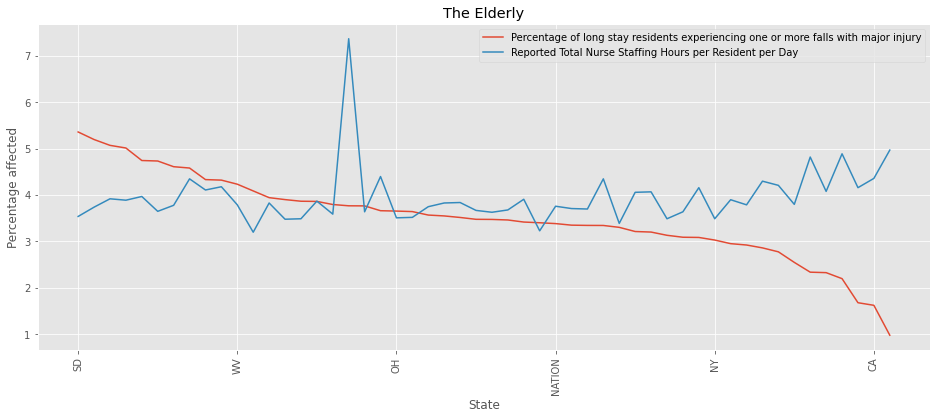

In [192]:
plt.rcParams["figure.figsize"] = [16, 6]


state_ave_plot = (state_ave.sort_values('Percentage of long stay residents experiencing one or more falls with major injury',\
                     ascending = False).plot.bar(x='State or Nation', 
                        y=['Percentage of long stay residents experiencing one or more falls with major injury',
                          'Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))

state_ave_plot = (state_ave.sort_values('Percentage of long stay residents experiencing one or more falls with major injury',\
                     ascending = False).plot.line(x='State or Nation', 
                        y=['Percentage of long stay residents experiencing one or more falls with major injury','Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))

#state_ave['Reported Total Nurse Staffing Hours per Resident per Day'].plot(secondary_y=True)

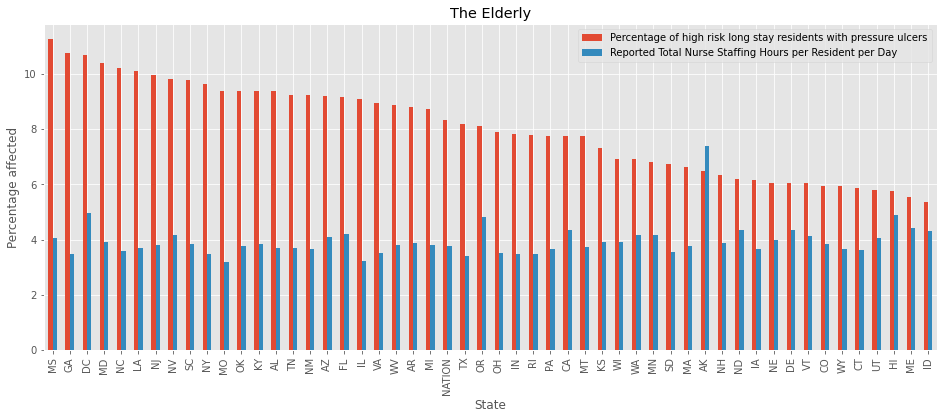

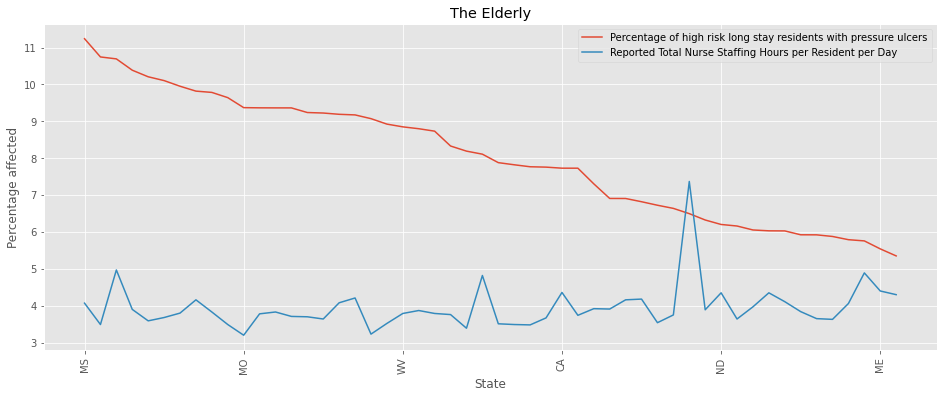

In [193]:
plt.rcParams["figure.figsize"] = [16, 6]


state_ave_plot = (state_ave.sort_values('Percentage of high risk long stay residents with pressure ulcers',\
                     ascending = False).plot.bar(x='State or Nation', 
                        y=['Percentage of high risk long stay residents with pressure ulcers',
                          'Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))


state_ave_plot = (state_ave.sort_values('Percentage of high risk long stay residents with pressure ulcers',\
                     ascending = False).plot.line(x='State or Nation', 
                        y=['Percentage of high risk long stay residents with pressure ulcers','Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))



#state_ave['Reported Total Nurse Staffing Hours per Resident per Day'].plot(secondary_y=True)

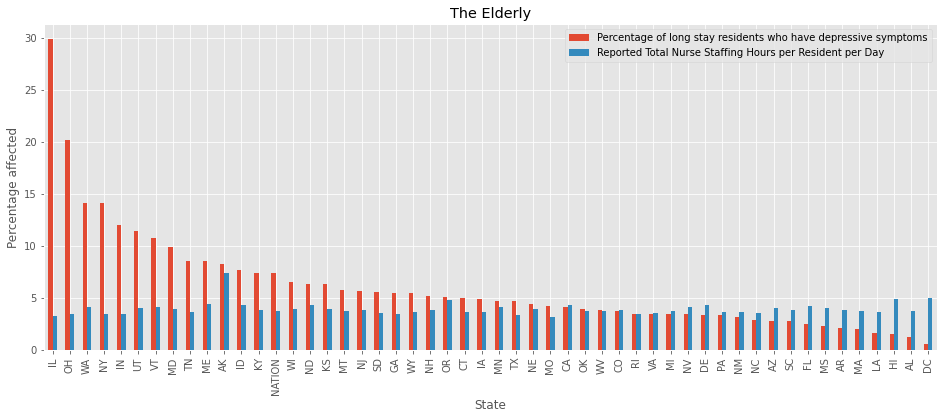

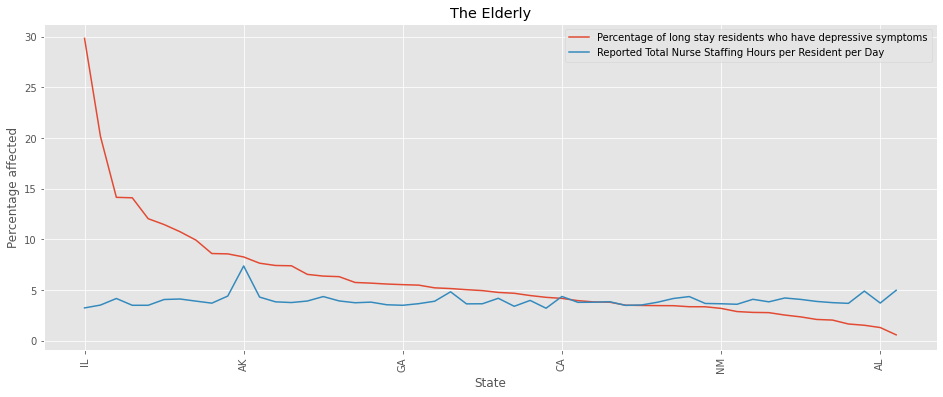

In [194]:
plt.rcParams["figure.figsize"] = [16, 6]


state_ave_plot = (state_ave.sort_values('Percentage of long stay residents who have depressive symptoms',\
                     ascending = False).plot.bar(x='State or Nation', 
                        y=['Percentage of long stay residents who have depressive symptoms',
                          'Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))

state_ave_plot = (state_ave.sort_values('Percentage of long stay residents who have depressive symptoms',\
                     ascending = False).plot.line(x='State or Nation', 
                        y=['Percentage of long stay residents who have depressive symptoms','Reported Total Nurse Staffing Hours per Resident per Day']
                                    , rot=90,
                  title = 'The Elderly', xlabel = 'State', ylabel = 'Percentage affected'))

#state_ave['Reported Total Nurse Staffing Hours per Resident per Day'].plot(secondary_y=True)

In [7]:
state_ave.columns.tolist()


['State or Nation',
 'Cycle 1 Total Number of Health Deficiencies',
 'Cycle 1 Total Number of Fire Safety Deficiencies',
 'Cycle 2 Total Number of Health Deficiencies',
 'Cycle 2 Total Number of Fire Safety Deficiencies',
 'Cycle 3 Total Number of Health Deficiencies',
 'Cycle 3 Total Number of Fire Safety Deficiencies',
 'Average Number of Residents per Day',
 'Reported Nurse Aide Staffing Hours per Resident per Day',
 'Reported LPN Staffing Hours per Resident per Day',
 'Reported RN Staffing Hours per Resident per Day',
 'Reported Licensed Staffing Hours per Resident per Day',
 'Reported Total Nurse Staffing Hours per Resident per Day',
 'Total number of nurse staff hours per resident per day on the weekend',
 'Registered Nurse hours per resident per day on the weekend',
 'Reported Physical Therapist Staffing Hours per Resident Per Day',
 'Total nursing staff turnover',
 'Registered Nurse turnover',
 'Number of administrators who have left the nursing home',
 'Case-Mix RN Staffing Ho

In [219]:
provider_data = pd.read_csv('data/NH_ProviderInfo_Mar2022.csv', encoding_errors='ignore')

provider_data = provider_data.dropna(axis = 1, how = 'all')
provider_data.reset_index(drop = True, inplace = True)
provider_data

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,5.333,0,0,0.0,1,650.0,0,1,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2022-03-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,18.667,0,0,0.0,1,650.0,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2022-03-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,30.667,0,0,0.0,0,0.0,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2022-03-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.0,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",2022-03-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,16.000,0,1,0.0,3,8333.0,0,3,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15211,686123,KENDALL LAKES HEALTH AND REHABILITATION CENTER,5280 SW 157 AVENUE,MIAMI,FL,33185,7864337400,120,Miami-Dade,For profit - Corporation,...,0.000,0,0,0.0,0,0.0,0,0,"5280 SW 157 AVENUE,MIAMI,FL,33185",2022-03-01
15212,686124,HARMONY HEALTH CENTER,9820 N KENDALL DRIVE,MIAMI,FL,33176,3052716311,120,Miami-Dade,For profit - Corporation,...,61.600,0,2,2.0,1,13065.0,0,1,"9820 N KENDALL DRIVE,MIAMI,FL,33176",2022-03-01
15213,745000,LAS ALTURAS DE PENITAS,414 LIBERTY BLVD.,PENITAS,TX,78576,5124392630,650,Hidalgo,For profit - Corporation,...,NaN,0,0,0.0,0,0.0,0,0,"414 LIBERTY BLVD.,PENITAS,TX,78576",2022-03-01
15214,745001,ESTATES AT SHAVANO PARK,4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249,5124382630,130,Bexar,For profit - Corporation,...,NaN,0,0,0.0,0,0.0,0,0,"4366 LOCKHILL SELMA,SHAVANO PARK,TX,78249",2022-03-01


In [220]:
provider_data.columns.tolist()

['Federal Provider Number',
 'Provider Name',
 'Provider Address',
 'Provider City',
 'Provider State',
 'Provider Zip Code',
 'Provider Phone Number',
 'Provider SSA County Code',
 'Provider County Name',
 'Ownership Type',
 'Number of Certified Beds',
 'Average Number of Residents per Day',
 'Average Number of Residents per Day Footnote',
 'Provider Type',
 'Provider Resides in Hospital',
 'Legal Business Name',
 'Date First Approved to Provide Medicare and Medicaid Services',
 'Continuing Care Retirement Community',
 'Special Focus Status',
 'Abuse Icon',
 'Most Recent Health Inspection More Than 2 Years Ago',
 'Provider Changed Ownership in Last 12 Months',
 'With a Resident and Family Council',
 'Automatic Sprinkler Systems in All Required Areas',
 'Overall Rating',
 'Overall Rating Footnote',
 'Health Inspection Rating',
 'Health Inspection Rating Footnote',
 'QM Rating',
 'QM Rating Footnote',
 'Long-Stay QM Rating',
 'Long-Stay QM Rating Footnote',
 'Short-Stay QM Rating',
 'Sh

In [222]:
state_owner = provider_data.groupby(['Provider State'])

state_owner.size()


# state_owner_profit = state_owner[state_owner['Ownership Type'].str.match('(for profit)')== True]

# state_owner_profit

Provider State
AK      20
AL     227
AR     221
AZ     142
CA    1178
CO     223
CT     208
DC      17
DE      45
FL     699
GA     360
GU       1
HI      43
IA     435
ID      80
IL     703
IN     526
KS     321
KY     280
LA     268
MA     367
MD     224
ME      90
MI     434
MN     361
MO     514
MS     204
MT      71
NC     426
ND      77
NE     195
NH      73
NJ     355
NM      68
NV      66
NY     611
OH     954
OK     298
OR     130
PA     684
PR       6
RI      76
SC     188
SD     104
TN     313
TX    1206
UT      98
VA     287
VT      35
WA     200
WI     345
WV     123
WY      36
dtype: int64

In [223]:
colFun = {'Total Weighted Health Survey Score':['count', 'sum', 'min', 'max', 'mean', 'std'],
          'Adjusted Total Nurse Staffing Hours per Resident per Day': ['min', 'max','mean'], 
          'Total Weighted Health Survey Score': ['min', 'max','mean']}

analysis = state_owner.agg(colFun)
analysis




# health_score = state_owner.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['Total Weighted Health Survey Score']

Total Weighted Health Survey Score                        \
                                              min       max        mean   
Provider State                                                            
AK                                         24.000   186.500   82.736650   
AL                                          0.000   372.000   27.692509   
AR                                          6.667   315.833   80.784335   
AZ                                          0.000   366.000   50.888036   
CA                                          1.333   810.500   96.439871   
CO                                          0.000   470.167   78.366968   
CT                                          2.000   324.500   49.109498   
DC                                         21.333   291.333  104.456882   
DE                                          2.667   214.667   89.386386   
FL                                          0.000  1286.170   48.728219   
GA                                          0.000   577.000   42.950472   
GU                                         60.667    60.667   60.667000   
HI                                          5.333   364.667   82.551930   
IA                                          0.000   687.333   44.708286   
ID                                          8.667   590.333  111.412228   
IL                                          0.000   653.333   89.725762   
IN                                          0.000   375.667   60.075457   
KS                                          0.000   407.333   61.037633   
KY                                          0.000   755.500   56.882398   
LA                                          0.000   255.667   35.205128   
MA                                          0.000   636.333   70.490654   
MD                                          0.000   537.667   83.753888   
ME                                          5.333   175.000   31.862989   
MI                                          6.000   765.833  125.277353   
MN                                          0.000   439.000   67.800568   
MO                                          0.000   523.833   70.324136   
MS                                          0.000  1075.670   50.649875   
MT                                          6.000   393.167   67.433314   
NC                                          0.000   470.167   48.970667   
ND                                          3.333   185.667   35.473618   
NE                                          4.667   317.333   60.839677   
NH                                          0.667   128.000   17.429260   
NJ                                          0.667   929.667   27.593701   
NM                                          1.333   637.833  121.772529   
NV                                         12.667   419.000   80.822182   
NY                                          0.000   267.167   28.225182   
OH                                          0.000   561.833   69.744574   
OK                                          0.000   369.500   73.444932   
OR                                          2.667   602.000  101.838767   
PA                                          0.000   308.500   49.015914   
PR                                         35.333   244.333  117.694167   
RI                                          2.000   333.000   49.649066   
SC                                          0.000   459.167   48.286128   
SD                                          2.000   387.500   47.264078   
TN                                          0.000  1000.170   51.773013   
TX                                          0.000   347.167   62.479042   
UT                                          0.000   282.500   65.069469   
VA                                          0.000   531.833   75.050427   
VT                                          0.000   253.667   37.971429   
WA                                         12.000   686.333  150.747626   
WI                                      